In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)

from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, SGD

Using TensorFlow backend.


# Example

Found 1 images belonging to 1 classes.


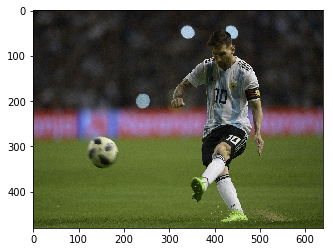

In [2]:
datagen = ImageDataGenerator(rescale=1./255)

gen = datagen.flow_from_directory("images/", class_mode=None, target_size=(480, 640), batch_size=5)

messi = gen.next()[0]
plt.imshow(messi)

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
                            horizontal_flip=True,
                            #vertical_flip = True,
                            rotation_range = 20,
                            width_shift_range=0.2,
                            height_shift_range=0.2)

gen = datagen.flow_from_directory("images/", class_mode=None, target_size=(480, 640), batch_size=5)

Found 1 images belonging to 1 classes.


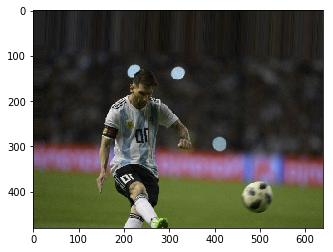

In [4]:
messi = gen.next()[0]
plt.imshow(messi)

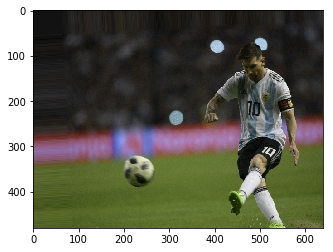

In [5]:
messi = gen.next()[0]
plt.imshow(messi)

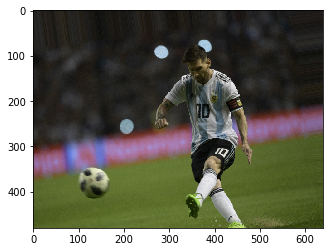

In [6]:
messi = gen.next()[0]
plt.imshow(messi)

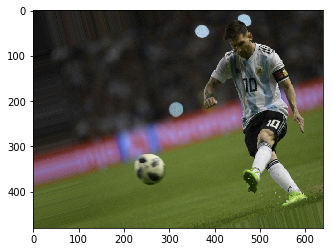

In [7]:
messi = gen.next()[0]
plt.imshow(messi)

# Train with data augmentation

### Data preprocessing and model specification

In [8]:
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    X_train = x_train.astype('float32')
    X_test = x_test.astype('float32')
    return X_train, y_train, X_test, y_test

def labelencoding(y_train, y_val, y_test, nb_classes):
    Y_val = to_categorical(y_val, num_classes = nb_classes)
    Y_test = to_categorical(y_test, num_classes = nb_classes)
    Y_train = to_categorical(y_train.reshape(-1, 1), num_classes = nb_classes)
    return Y_train, Y_val, Y_test

def split_dataset(X_train, Y_train):

    # Set the random seed
    random_seed = 2

    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)
    
    return X_train, X_val, Y_train, Y_val

CLASSES = 10
X_train, Y_train, X_test, Y_test = load_data()
X_train, X_val, Y_train, Y_val = split_dataset(X_train, Y_train)
Y_train, Y_val, Y_test = labelencoding(Y_train, Y_val, Y_test, CLASSES)

#X_train = X_train / 255.
#X_val = X_val / 255.
#X_test = X_test / 255.

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', name="dense_1"))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', name="dense_2"))

rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

### Set Data Generator

In [9]:
datagen_train = ImageDataGenerator(rescale=1./255,
                           horizontal_flip=True,
                           #vertical_flip = True,
                           rotation_range = 20,
                           width_shift_range=0.2,
                           height_shift_range=0.2)

datagen_val = ImageDataGenerator(rescale=1./255)

In [10]:
BATCH_SIZE = 64
EPOCHS = 20

history = model.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                              epochs = EPOCHS,
                              validation_data = datagen_val.flow(X_val, Y_val, batch_size=BATCH_SIZE),
                              steps_per_epoch = X_train.shape[0] // BATCH_SIZE,
                              validation_steps = X_val.shape[0] // BATCH_SIZE)

Epoch 1/20
625/625 [==============================] - 55s 88ms/step - loss: 1.9013 - acc: 0.2977 - val_loss: 1.5183 - val_acc: 0.4502
Epoch 2/20
625/625 [==============================] - 54s 87ms/step - loss: 1.6413 - acc: 0.3989 - val_loss: 1.4260 - val_acc: 0.4964
Epoch 3/20
625/625 [==============================] - 55s 88ms/step - loss: 1.5147 - acc: 0.4494 - val_loss: 1.3277 - val_acc: 0.5251
Epoch 4/20
625/625 [==============================] - 56s 89ms/step - loss: 1.4239 - acc: 0.4900 - val_loss: 1.2994 - val_acc: 0.5580
Epoch 5/20
625/625 [==============================] - 53s 85ms/step - loss: 1.3703 - acc: 0.5122 - val_loss: 1.2716 - val_acc: 0.5646
Epoch 6/20
625/625 [==============================] - 57s 92ms/step - loss: 1.3235 - acc: 0.5283 - val_loss: 1.1933 - val_acc: 0.5837
Epoch 7/20
625/625 [==============================] - 56s 90ms/step - loss: 1.2831 - acc: 0.5473 - val_loss: 1.0599 - val_acc: 0.6356
Epoch 8/20
625/625 [==============================] - 55s 88ms

## Learning Curves

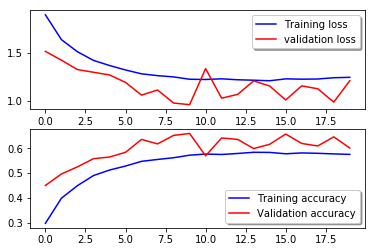

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()